In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [18]:
df = pd.read_csv('datasets/titanic-training-data.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# drop Passengerid and Ticket, Name
df.drop(['PassengerId','Ticket','Name'],axis=1, inplace=True)

In [21]:
df.shape

(891, 9)

In [22]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [23]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [24]:
# replace missing values with mode for categorical and median for numerical columns
df['Age'] = df['Age'].replace(np.nan,df['Age'].median())

df['Embarked'] = df['Embarked'].replace(np.nan, df['Embarked'].mode()[0])

# drop Cabin column since it has missing values more than half 
df.drop(['Cabin'], axis=1, inplace=True)

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
# descriptive stats
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Split the dataset

In [27]:
X = df.drop(['Survived'],axis=1)
Y = df['Survived']

In [28]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [29]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100,stratify=Y)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


### OneHotEncoding and Standardizing data

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [44]:
cat_cols = X.select_dtypes(include=["object","bool"]).columns
num_cols = X.select_dtypes(include=["float64","int64"]).columns


preprocessor = ColumnTransformer(transformers=[('cat',OneHotEncoder(),cat_cols),('num',StandardScaler(),num_cols)],remainder='passthrough')



In [45]:
# transforming data
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

### Model building

In [46]:
logR = LogisticRegression()

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       110
           1       0.71      0.80      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179



<Axes: >

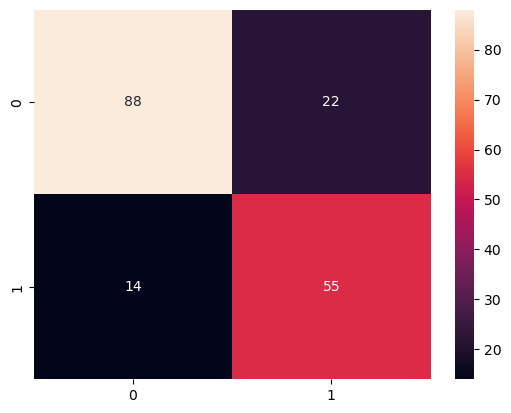

In [48]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

### Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier


In [54]:
tree_model = DecisionTreeClassifier(max_depth=6)
tree_model.fit(x_train,y_train)

y_pred_train = tree_model.predict(x_train)
y_pred_test = tree_model.predict(x_test)

In [55]:
train_score = accuracy_score(y_train,y_pred_train)

0.8735955056179775

In [58]:
test_score =accuracy_score(y_test,y_pred_test)
test_score

0.8268156424581006

## Pima-Indians Diabetes

In [59]:
df = pd.read_csv('datasets/pima-indians-diabetes-2.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.shape

(768, 9)

In [61]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [62]:
# split the dataset 
X = df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [63]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1, stratify=Y)

### LogisticRegression

In [64]:
logR = LogisticRegression()
logR.fit(x_train,y_train)


LogisticRegression()

In [65]:
logR.score(x_train,y_train)

0.7833876221498371

In [66]:
logR.score(x_test,y_test)

0.7857142857142857

## DecisionTree Model


In [92]:
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [93]:
dt.score(x_train,y_train)

0.7785016286644951

In [94]:
dt.score(x_test,y_test)

0.7597402597402597